In [49]:
allure_etudier=1

In [50]:
import sys
sys.path.insert(0, "C:/projets_python/diabolo")
import warnings
warnings.filterwarnings("ignore")

In [51]:
from math import *

#LIBRAIRIES PERSO
import etude_variable.jouer as jj
# LIBRAIRIE PYHTON CLASSIQUES
import pandas as pd
import numpy as np
import matplotlib
import scipy
import platform
from collections import Counter
#ESTIMATEUR
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform
from scipy.stats import randint

#TRAINING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import dask_searchcv as dcv
from skopt.space import Real, Integer
from sklearn.model_selection import cross_validate

#Evaluateur
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel


from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.utils import class_weight

#outils
from dask.diagnostics import ProgressBar
import logging
from datetime import datetime


#Metriques
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  classification_report

#Outils

import time


#Graphique
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0


In [52]:

xnames =jj.get_names()
xnames2 = jj.get_names2()
    

In [53]:
index_col = ['IDPARTCIPANT', 'IDCOURSE']
start_time=jj.timer()
# lecture des données brutes contruite par l'application Windev
df = jj.lecture_data('d:\data_diabolo.csv', xnames, xindex_col=index_col, allure=allure_etudier, avec_index=False)
df = df.groupby("ALLURE")
df = df.get_group(allure_etudier)

jj.timer(start_time)


2018-07-19 22:40:56.536700

 Time taken: 0 hours 0 minutes and 3.4 seconds.


In [54]:
df.describe()

,ALLURE,CO_DISTANCE,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_ARRIVE,PAR_CARRIERE,PAR_CARRIERE_Q,...,NOM_JOC,NOM_ENTR,POIDS,CORDE,CHEVAL,PAR_VALEUR,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE
count,250191.0,250191.000000,250191.000000,250191.000000,250191.000000,250191.000000,250191.000000,250191.000000,250191.000000,250191.000000,...,250191.000000,250191.000000,250191.0,250191.0,250191.000000,250191.0,250191.000000,250191.000000,250191.000000,250191.000000
mean,1.0,1.289635,23660.423436,58.483343,31745.588514,392066.428621,5.395402,63.950134,46.190087,1.790200,...,1454.829666,1406.028370,0.0,0.0,21663.806928,0.0,3.617268,4.478746,0.081506,153.862853
std,0.0,0.462736,31332.143565,47.879835,14240.760380,177007.498315,1.924934,46.228224,57.110886,51.027604,...,1477.297189,1438.904414,0.0,0.0,18507.539538,0.0,5.180985,5.227166,1.400970,186.432998
min,1.0,1.000000,0.000000,1.000000,1616.000000,19832.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,12000.000000,25.000000,21335.000000,261755.500000,4.000000,4.000000,22.000000,0.000000,...,362.000000,409.000000,0.0,0.0,7065.000000,0.0,0.000000,1.000000,0.000000,32.000000
50%,1.0,1.000000,20000.000000,45.000000,31624.000000,390333.000000,5.000000,99.000000,40.000000,0.000000,...,1030.000000,1047.000000,0.0,0.0,16311.000000,0.0,2.000000,3.000000,0.000000,91.000000
75%,1.0,2.000000,25000.000000,85.000000,42352.000000,524802.500000,7.000000,99.000000,64.000000,0.000000,...,2029.000000,1775.000000,0.0,0.0,31709.000000,0.0,5.000000,6.000000,0.000000,183.000000
max,1.0,5.000000,1000000.000000,287.000000,56526.000000,699231.000000,16.000000,99.000000,6600.000000,6600.000000,...,8873.000000,9714.000000,0.0,0.0,82161.000000,0.0,55.000000,847.000000,495.000000,898.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002880BC62048>,
      dtype=object)

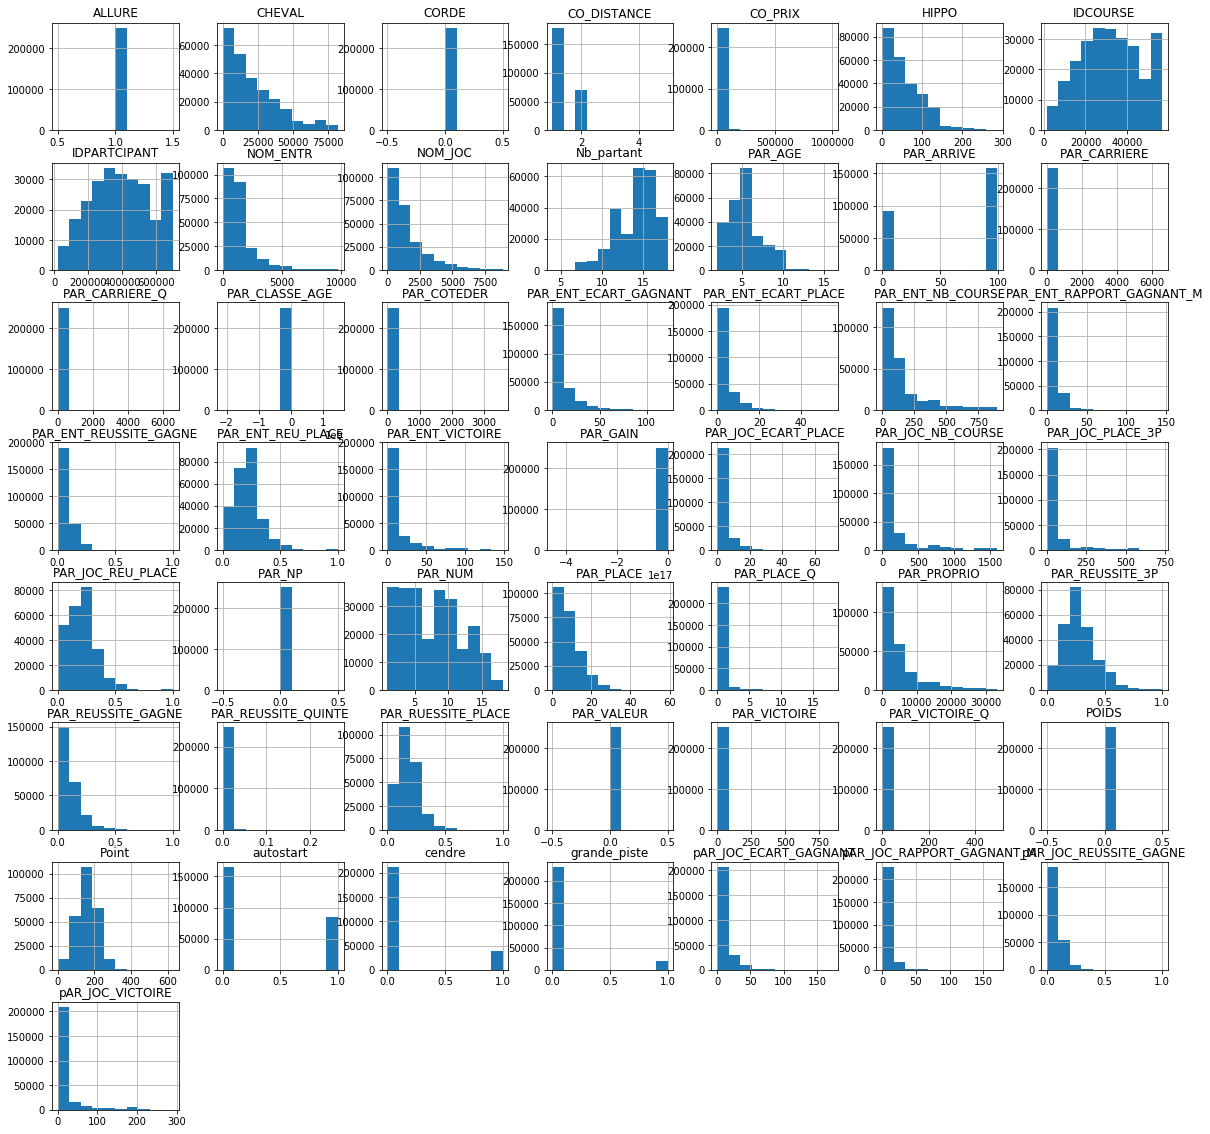

In [55]:
df.hist( figsize = (20,20))

In [56]:
# Gestion de l'allure et de la selection

df2=jj.transformation(df,allure_etudier)



----------- TRANSFORMATION --------- AJOUT DE COLONNE------------

2018-07-19 22:41:05.483777

 Time taken: 0 hours 0 minutes and 0.67 seconds.


In [57]:
df2.describe()

,CO_DISTANCE,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,...,NOM_ENTR,POIDS,CORDE,CHEVAL,PAR_VALEUR,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,SELECTION2
count,238975.000000,238975.000000,238975.000000,238975.000000,238975.000000,238975.000000,238975.000000,238975.000000,238975.000000,238975.000000,...,238975.000000,238975.0,238975.0,238975.000000,238975.0,238975.000000,238975.000000,238975.000000,238975.000000,238975.000000
mean,1.288336,23405.128198,58.098835,31821.554631,393006.740990,5.374997,46.050486,1.698132,9605.471945,32.864228,...,1398.059525,0.0,0.0,21592.570796,0.0,3.627706,4.443197,0.077853,154.046729,0.074368
std,0.461491,27942.481684,47.458611,14193.095480,176423.822493,1.914170,54.734094,47.271576,12251.595315,45.795699,...,1427.963353,0.0,0.0,18433.138294,0.0,5.190445,5.184827,1.416057,186.134066,0.262369
min,1.000000,0.000000,1.000000,1616.000000,19832.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12000.000000,25.000000,21452.000000,263188.500000,4.000000,22.000000,0.000000,2162.000000,8.000000,...,409.000000,0.0,0.0,7072.000000,0.0,0.000000,1.000000,0.000000,32.000000,0.000000
50%,1.000000,20000.000000,45.000000,31707.000000,391478.000000,5.000000,40.000000,0.000000,6433.000000,18.000000,...,1044.000000,0.0,0.0,16297.000000,0.0,2.000000,3.000000,0.000000,91.000000,0.000000
75%,2.000000,25000.000000,85.000000,42389.000000,525245.500000,7.000000,64.000000,0.000000,12741.000000,38.000000,...,1772.000000,0.0,0.0,31436.000000,0.0,5.000000,6.000000,0.000000,183.000000,0.000000
max,5.000000,1000000.000000,287.000000,56526.000000,699231.000000,15.000000,6600.000000,6600.000000,318680.000000,3585.000000,...,9714.000000,0.0,0.0,82161.000000,0.0,55.000000,847.000000,495.000000,898.000000,1.000000


In [58]:


df2=jj.calcul_les_notes(df2,allure_etudier)

2018-07-19 22:41:07.182250

 Time taken: 0 hours 0 minutes and 0.15 seconds.
    print(N°  0 None

 Time taken: 0 hours 4 minutes and 53.11 seconds.
    print(N°  800 None

 Time taken: 0 hours 9 minutes and 41.79 seconds.
    print(N°  1600 None

 Time taken: 0 hours 14 minutes and 32.52 seconds.
    print(N°  2400 None

 Time taken: 0 hours 19 minutes and 21.72 seconds.
    print(N°  3200 None

 Time taken: 0 hours 24 minutes and 8.81 seconds.
    print(N°  4000 None

 Time taken: 0 hours 28 minutes and 49.84 seconds.
    print(N°  4800 None

 Time taken: 0 hours 33 minutes and 18.93 seconds.
    print(N°  5600 None

 Time taken: 0 hours 37 minutes and 52.58 seconds.
    print(N°  6400 None

 Time taken: 0 hours 42 minutes and 26.42 seconds.
    print(N°  7200 None

 Time taken: 0 hours 46 minutes and 58.11 seconds.
    print(N°  8000 None

 Time taken: 0 hours 51 minutes and 30.11 seconds.
    print(N°  8800 None

 Time taken: 0 hours 55 minutes and 58.33 seconds.
    print(N°  9600

In [59]:
#sauvegarde du fichier
jj.sauvegarde(df2=df2,allure=allure_etudier,xnames2=xnames2)
df2.head()
  





2018-07-20 00:23:46.353292

 Time taken: 0 hours 0 minutes and 10.53 seconds.


,CO_DISTANCE,CO_PRIX,HIPPO,IDCOURSE,IDPARTCIPANT,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_CLASSE_AGE,PAR_COTEDER,...,MUSIC_JOC,PAR_VALEUR,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,FIN_ligne,SELECTION2,p2018,aux
13,2,52000,1,1616,19849,6,41,1.0,36220.0,7,...,5MDA0M3A,0,2,7.0,1,808.0,FINFIN,0,170.748005,7.0
14,2,52000,1,1616,19848,7,61,9.0,30670.0,199,...,3A7A7A2A,0,1,5.0,0,192.0,FINFIN,0,123.121641,5.0
15,2,52000,1,1616,19847,8,83,9.0,26118.0,60,...,7A1ADADA,0,4,11.0,1,119.0,FINFIN,0,147.700275,11.0
16,2,52000,1,1616,19846,6,45,0.0,33798.0,3,...,4ADA2ADA,0,0,10.0,0,175.0,FINFIN,1,150.716846,10.0
17,2,52000,1,1616,19845,7,64,4.0,27212.0,35,...,DADA2ADA,0,2,9.0,0,280.0,FINFIN,0,113.025028,9.0


In [60]:
print(df2)


        CO_DISTANCE  CO_PRIX  HIPPO  IDCOURSE  IDPARTCIPANT  PAR_AGE  \
13                2    52000      1      1616         19849        6   
14                2    52000      1      1616         19848        7   
15                2    52000      1      1616         19847        8   
16                2    52000      1      1616         19846        6   
17                2    52000      1      1616         19845        7   
18                2    52000      1      1616         19844        6   
19                2    52000      1      1616         19843        8   
20                2    52000      1      1616         19842        6   
21                1    52000      1      1616         19841        7   
22                1    52000      1      1616         19840        8   
23                1    52000      1      1616         19839        8   
24                1    52000      1      1616         19838        7   
25                1    52000      1      1616         19837     

In [ ]:
i

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 195 entries, (1227071, 98991) to (1227326, 99013)
Data columns (total 37 columns):
PAR_AGE                      195 non-null int64
PAR_CARRIERE                 195 non-null float64
PAR_CARRIERE_Q               195 non-null float64
PAR_ENT_ECART_GAGNANT        195 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M    195 non-null float64
PAR_ENT_REU_PLACE            195 non-null float64
PAR_ENT_REUSSITE_GAGNE       195 non-null float64
PAR_ENT_VICTOIRE             195 non-null float64
pAR_JOC_ECART_GAGNANT        195 non-null int64
PAR_JOC_ECART_PLACE          195 non-null int64
PAR_JOC_NB_COURSE            195 non-null float64
PAR_JOC_PLACE_3P             195 non-null float64
pAR_JOC_RAPPORT_GAGNANT_M    195 non-null float64
PAR_JOC_REU_PLACE            195 non-null float64
pAR_JOC_REUSSITE_GAGNE       195 non-null float64
pAR_JOC_VICTOIRE             195 non-null float64
PAR_NUM                      195 non-null int64
PAR_PLACE                  

,,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,pAR_JOC_ECART_GAGNANT,PAR_JOC_ECART_PLACE,...,NOM_ENTR,POIDS,CORDE,CHEVAL,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,p2018,SELECTION
IDPARTCIPANT,IDCOURSE,,,,,,,,,,,,,,,,,,,,,
1227071,98991,3,1.0,0.0,5,5.20,0.36,0.09,19.0,4,0,...,1095,54,8,121624,0,0.0,0.0,191.0,68.297082,0
1227327,99013,2,4.0,0.0,3,6.80,0.32,0.11,9.0,2,0,...,3540,57,5,109237,3,3.0,0.0,79.0,102.000449,0
1227072,98991,3,1.0,0.0,0,6.85,0.28,0.07,9.0,24,6,...,171,54,10,121625,0,0.0,0.0,121.0,64.848411,0
1227328,99013,2,3.0,0.0,2,11.05,0.30,0.10,2.0,2,2,...,450,57,9,121669,0,2.0,0.0,20.0,87.092059,0
1227073,98991,3,1.0,0.0,3,5.05,0.46,0.22,64.0,10,0,...,165,54,6,2443,0,0.0,0.0,290.0,82.480081,0
1227329,99014,3,8.0,0.0,6,8.27,0.51,0.12,7.0,0,0,...,3344,60,5,121670,0,1.0,0.0,54.0,116.526502,0
1227074,98992,3,3.0,0.0,5,5.20,0.36,0.09,19.0,17,10,...,1095,57,2,104092,0,0.0,0.0,191.0,55.650771,0
1227330,99014,3,5.0,0.0,10,3.47,0.38,0.19,23.0,7,1,...,480,59,6,37384,2,3.0,0.0,116.0,126.256438,0
1227075,98992,3,2.0,0.0,13,4.84,0.37,0.14,46.0,20,0,...,174,57,3,102941,3,1.0,0.0,318.0,112.930653,0


ValueError: feature_names mismatch: ['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant', 'PAR_PROPRIO', 'NOM_JOC', 'NOM_ENTR', 'POIDS', 'CORDE', 'CHEVAL', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE', 'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018'] ['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant', 'PAR_PROPRIO', 'NOM_JOC', 'NOM_ENTR', 'CHEVAL', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE', 'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018']
expected CORDE, POIDS in input data

,,PAR_AGE,PAR_CARRIERE,PAR_CARRIERE_Q,PAR_ENT_ECART_GAGNANT,PAR_ENT_RAPPORT_GAGNANT_M,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_ENT_VICTOIRE,pAR_JOC_ECART_GAGNANT,PAR_JOC_ECART_PLACE,...,Nb_partant,PAR_PROPRIO,NOM_JOC,NOM_ENTR,CHEVAL,PAR_ENT_ECART_PLACE,PAR_VICTOIRE,PAR_VICTOIRE_Q,PAR_ENT_NB_COURSE,p2018
IDPARTCIPANT,IDCOURSE,,,,,,,,,,,,,,,,,,,,,
1227021,98987,2,1.0,0.0,11,5.36,0.46,0.16,70.0,4,0,...,12,45329,150,161,121610,0,0.0,0.0,414.0,114.299205
1227079,98993,3,2.0,0.0,5,5.20,0.36,0.09,19.0,4,0,...,5,2825,150,1095,109924,0,0.0,0.0,191.0,99.899128
1227038,98989,4,22.0,2.0,8,6.93,0.37,0.10,27.0,12,5,...,10,1560,866,975,9311,5,2.0,0.0,246.0,102.039221
1227120,98996,6,37.0,3.0,3,30.16,0.17,0.05,3.0,3,3,...,16,45598,207,204,13210,3,5.0,1.0,52.0,99.375964
1227105,98995,3,1.0,0.0,14,5.86,0.19,0.04,3.0,41,4,...,15,6617,2714,1462,121641,11,0.0,0.0,61.0,20.507243
1227036,98988,3,1.0,0.0,1,2.95,0.45,0.36,4.0,5,5,...,11,7530,161,3168,121618,1,0.0,0.0,11.0,52.596282
1227354,99016,2,2.0,0.0,9,4.99,0.39,0.15,38.0,0,0,...,13,8866,415,451,121683,0,0.0,0.0,251.0,117.519021
1227334,99014,3,21.0,0.0,3,6.80,0.32,0.11,9.0,3,3,...,9,21077,3664,3540,110036,3,5.0,0.0,79.0,95.612915
1227136,98998,2,3.0,0.0,4,10.91,0.32,0.11,14.0,10,3,...,9,4765,618,1081,121644,4,0.0,0.0,119.0,45.576544


In [1025]:
df_pred = pd.DataFrame.from_dict(y_pred)

test_copy = test_x.copy() #################

PROBA = model.predict_proba(test_x)


ValueError: feature_names mismatch: ['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant', 'PAR_PROPRIO', 'NOM_JOC', 'NOM_ENTR', 'POIDS', 'CORDE', 'CHEVAL', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE', 'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018'] ['PAR_AGE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_NUM', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant', 'PAR_PROPRIO', 'NOM_JOC', 'NOM_ENTR', 'CHEVAL', 'PAR_ENT_ECART_PLACE', 'PAR_VICTOIRE', 'PAR_VICTOIRE_Q', 'PAR_ENT_NB_COURSE', 'p2018']
expected CORDE, POIDS in input data

In [1026]:
df_proba = pd.DataFrame.from_dict(PROBA)    
df_final = pd.concat([df_proba, df_pred], axis=1)
df_final

,0,1,0
0,0.864904,0.135096,0
1,0.987555,0.012445,0
2,0.611015,0.388985,0
3,0.379053,0.620947,1
4,0.995906,0.004094,0
5,0.985851,0.014149,0
6,0.968366,0.031634,0
7,0.527322,0.472678,0
8,0.996356,0.003644,0
9,0.139087,0.860913,1


In [1027]:

test_x = test_copy.copy()

test_x =my_drop(test_x, 'PAR_CLASSE_AGE')

test_x =my_drop(test_x, 'PAR_ENT_ECART_GAGNANT')
test_x =my_drop(test_x, 'PAR_ENT_RAPPORT_GAGNANT_M')
test_x =my_drop(test_x, 'PAR_ENT_REU_PLACE')
test_x =my_drop(test_x, 'PAR_ENT_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'PAR_ENT_VICTOIRE')
test_x =my_drop(test_x, 'PAR_GAIN')
test_x =my_drop(test_x, 'pAR_JOC_ECART_GAGNANT')
test_x =my_drop(test_x, 'PAR_JOC_ECART_PLACE')
test_x =my_drop(test_x, 'PAR_JOC_NB_COURSE')
test_x =my_drop(test_x, 'PAR_JOC_PLACE_3P')
test_x =my_drop(test_x, 'PAR_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'PAR_REUSSITE_QUINTE')
test_x =my_drop(test_x, 'PAR_RUESSITE_PLACE')
test_x =my_drop(test_x, 'CO_PRIX')
test_x =my_drop(test_x, 'PAR_CARRIERE')
test_x =my_drop(test_x, 'PAR_CARRIERE_Q')
test_x =my_drop(test_x, 'pAR_JOC_RAPPORT_GAGNANT_M')
test_x =my_drop(test_x, 'pAR_JOC_REUSSITE_GAGNE')
test_x =my_drop(test_x, 'pAR_JOC_VICTOIRE')
test_x =my_drop(test_x, 'PAR_PLACE')
test_x =my_drop(test_x, 'PAR_PLACE_Q')
test_x =my_drop(test_x, 'PAR_CLASSE_AGE')
test_x =my_drop(test_x, 'pAR_JOC_VICTOIRE')
test_x =my_drop(test_x, 'PAR_REUSSITE_3P')
test_x =my_drop(test_x, 'PAR_JOC_REU_PLACE')
test_x =my_drop(test_x, 'PAR_NUM')
test_x =my_drop(test_x, 'PAR_COTEDER')
test_x =my_drop(test_x, 'CORDE')
test_x =my_drop(test_x, 'musique')
test_x =my_drop(test_x, 'CHEVAL')
test_x =my_drop(test_x, 'Nb_partant')

test_x =my_drop(test_x, 'autostart')
test_x =my_drop(test_x, 'grande_piste')
test_x =my_drop(test_x, 'cendre')

test_x =my_drop(test_x, 'PAR_PROPRIO')
test_x =my_drop(test_x, 'NOM_JOC')
test_x =my_drop(test_x, 'NOM_ENTR')

test_x =my_drop(test_x, 'HIPPO')
test_x =my_drop(test_x, 'PAR_AGE')
test_x =my_drop(test_x, 'POIDS')
test_x =my_drop(test_x, 'CO_DISTANCE')
test_x =my_drop(test_x, 'CO_PRIX')
test_x =my_drop(test_x, 'PAR_GAIN_NORMA')
test_x =my_drop(test_x, 'CHEVAL2')
test_x =my_drop(test_x, 'PAR_REUSSITE_3P2')
test_x =my_drop(test_x, 'PAR_REUSSITE_QUINTE2')
test_x =my_drop(test_x, 'PAR_CLASSE_AGE2')
test_x =my_drop(test_x, 'PAR_COTEDER2')
test_x =my_drop(test_x, 'Point')

test_x =my_drop(test_x, 'MUSIC_CHEVAL')
test_x =my_drop(test_x, 'MUSIC_ENT')
test_x =my_drop(test_x, 'MUSIC_JOC')
test_x =my_drop(test_x, 'PAR_VALEUR')

test_x =my_drop(test_x, 'MY_REUSSITE_CHEVAL')
test_x =my_drop(test_x, 'MY_REUSSITE_JOC')

test_x =my_drop(test_x, 'MY_REUSSITE_ENT')
test_x =my_drop(test_x, 'MY_ECART_JOC')
test_x =my_drop(test_x, 'CLA_AGE_PRIX')
test_x =my_drop(test_x, 'MY_auto_start')


test_x =my_drop(test_x, 'PAR_ENT_ECART_PLACE')
test_x =my_drop(test_x, 'PAR_VICTOIRE')
test_x =my_drop(test_x, 'PAR_VICTOIRE_Q')
test_x =my_drop(test_x, 'CHEVAL_QUINTE')
test_x =my_drop(test_x, 'PAR_ENT_NB_COURSE')
test_x =my_drop(test_x, 'p2018')


test_x['v0'] = 0.0
test_x['v1'] = 0.0
test_x['sel'] = 0




test_x.head

<bound method NDFrame.head of                         v0   v1  sel
IDPARTCIPANT IDCOURSE               
1227021      98987     0.0  0.0    0
1227079      98993     0.0  0.0    0
1227038      98989     0.0  0.0    0
1227120      98996     0.0  0.0    0
1227105      98995     0.0  0.0    0
1227036      98988     0.0  0.0    0
1227354      99016     0.0  0.0    0
1227334      99014     0.0  0.0    0
1227136      98998     0.0  0.0    0
1227135      98998     0.0  0.0    0
1227321      99013     0.0  0.0    0
1227080      98993     0.0  0.0    0
1227112      98996     0.0  0.0    0
1227331      99014     0.0  0.0    0
1227047      98989     0.0  0.0    0
1227141      98998     0.0  0.0    0
1227361      99017     0.0  0.0    0
1227137      98998     0.0  0.0    0
1227325      99013     0.0  0.0    0
1227002      98986     0.0  0.0    0
1227006      98986     0.0  0.0    0
1227027      98988     0.0  0.0    0
1227104      98995     0.0  0.0    0
1227349      99016     0.0  0.0    0
1227041 

In [1028]:
# test_x
cumul = 1
nb_rows = len(df_proba.index)
print("nb_rows=", nb_rows)
print(" FORMATION DU FICHIER ...",allure_etudier)
for i in range(0, nb_rows):
        n = df_proba[0][i]
        test_x['v0'][i] = n
        
        n = df_proba[1][i]
        test_x['v1'][i] = n
        


timer(start_time)

nb_rows= 195
 FORMATION DU FICHIER ... 1

 Time taken: 0 hours 8 minutes and 21.27 seconds.


In [1029]:
test_x.head

<bound method NDFrame.head of                              v0        v1  sel
IDPARTCIPANT IDCOURSE                         
1227021      98987     0.864904  0.135096    0
1227079      98993     0.987555  0.012445    0
1227038      98989     0.611015  0.388985    0
1227120      98996     0.379053  0.620947    0
1227105      98995     0.995906  0.004094    0
1227036      98988     0.985851  0.014149    0
1227354      99016     0.968366  0.031634    0
1227334      99014     0.527322  0.472678    0
1227136      98998     0.996356  0.003644    0
1227135      98998     0.139087  0.860913    0
1227321      99013     0.655056  0.344944    0
1227080      98993     0.246727  0.753273    0
1227112      98996     0.804285  0.195715    0
1227331      99014     0.765923  0.234077    0
1227047      98989     0.980263  0.019737    0
1227141      98998     0.952785  0.047215    0
1227361      99017     0.618087  0.381913    0
1227137      98998     0.982706  0.017294    0
1227325      99013     0.68639

In [1030]:
print("\n\n fin de copie sur Test_x", test_x.head(10))

if (allure_etudier == 1):
    test_x.to_csv("d:\py_resultat_trot.csv")

if (allure_etudier == 2):
    test_x.to_csv("d:\py_resultat_galop.csv")

if (allure_etudier == 3):
    test_x.to_csv("d:\py_resultat_trot_monte.csv")

if (allure_etudier == 4):
    test_x.to_csv("d:\py_resultat_haie.csv")

if (allure_etudier == 5):
    test_x.to_csv("d:\py_resultat_steeple.csv")




 fin de copie sur Test_x                              v0        v1  sel
IDPARTCIPANT IDCOURSE                         
1227021      98987     0.864904  0.135096    0
1227079      98993     0.987555  0.012445    0
1227038      98989     0.611015  0.388985    0
1227120      98996     0.379053  0.620947    0
1227105      98995     0.995906  0.004094    0
1227036      98988     0.985851  0.014149    0
1227354      99016     0.968366  0.031634    0
1227334      99014     0.527322  0.472678    0
1227136      98998     0.996356  0.003644    0
1227135      98998     0.139087  0.860913    0
